# 1. Linear Regression

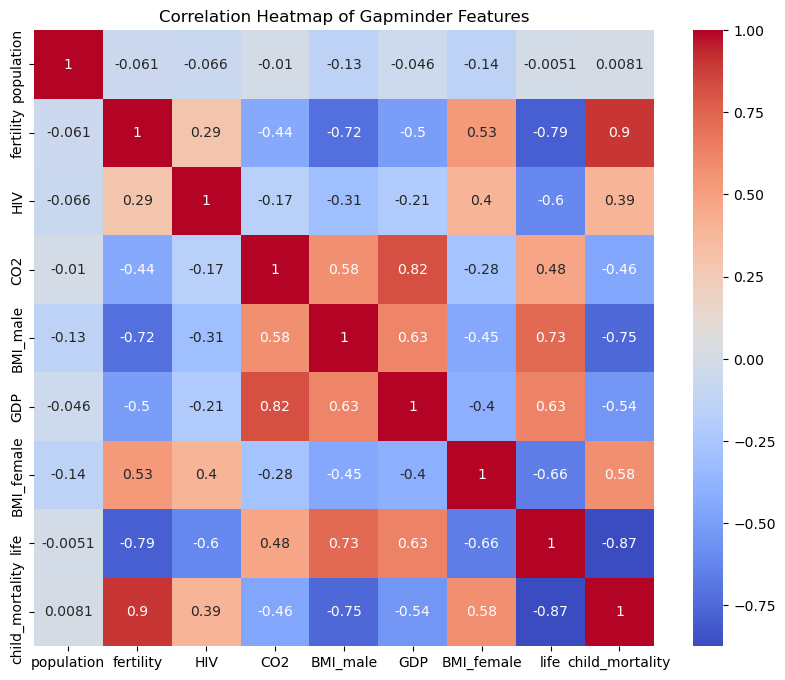

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the correlation matrix
corr_matrix = data.corr()

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of Gapminder Features')
plt.show()

Apply linear regression with the 'fertility' feature to predict life expectancy.

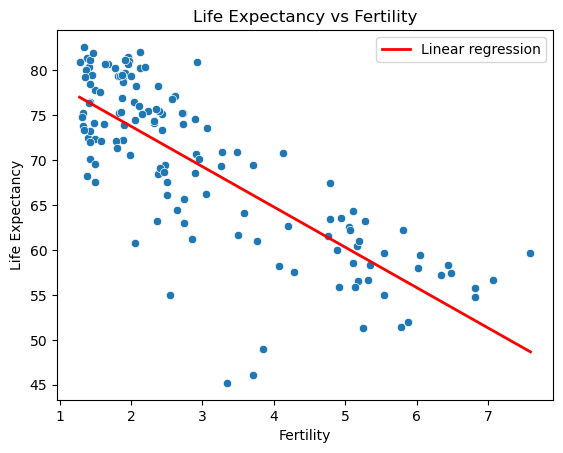

In [8]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
from warnings import simplefilter
simplefilter(action='ignore', category=UserWarning)

# Extract features and target variables
X = data[['fertility']]
y = data['life']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Customize the plot
sns.scatterplot(x='fertility', y='life', data=data)
x_line = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)
y_line = model.predict(x_line)
plt.plot(x_line, y_line, color='red', lw=2, label='Linear regression')
plt.xlabel('Fertility')
plt.ylabel('Life Expectancy')
plt.title('Life Expectancy vs Fertility')
plt.legend()
plt.show()

Apply linear regression with all features to predict life expectancy and compare the model scores:

In [10]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder

# Load the Gapminder data
data = pd.read_csv("gapminder.csv")

# One-hot encode the Region column
data = pd.get_dummies(data, columns=['Region'])

# Extract features and target variables
X_all = data.drop('life', axis=1)
y_all = data['life']

# Split the data into training and testing sets
X_train_all, X_test_all, y_train_all, y_test_all = train_test_split(X_all, y_all, test_size=0.2, random_state=42)

# Train the linear regression model
model_all = LinearRegression()
model_all.fit(X_train_all, y_train_all)

# Predict on the test set
y_pred_all = model_all.predict(X_test_all)

# Evaluate the model
mse_all = mean_squared_error(y_test_all, y_pred_all)
r2_all = r2_score(y_test_all, y_pred_all)
print("Mean squared error (all features):", mse_all)
print("R2 score (all features):", r2_all)

Mean squared error (all features): 5.508279530852681
R2 score (all features): 0.9175304584657349


In [11]:
# Extract features and target variables
X = data[['fertility']]
y = data['life']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean squared error:", mse)
print("R2 score:", r2)

Mean squared error: 12.719085109582442
R2 score: 0.8095708266351931


Use one feature will result in higher Mean squared error and lower R2 score. A higher MSE indicates that the model's predictions are, on average, further away from the actual values. In other words, the model has a larger error and doesn't fit the data as well. A lower R2 score means that the model is not able to capture much of the variability in the data, and therefore its predictions are less accurate.

Apply 5-fold cross-validation (for both 2 above steps) and compare your model score
accuracy. Hint: from sklearn.model_selection import cross_val_score.

In [12]:
from sklearn.model_selection import cross_val_score

# 5-fold cross-validation for linear regression with 'fertility'
cv_scores = cross_val_score(model, X, y, cv=5, scoring='r2')
print("5-fold cross-validation scores (fertility):", cv_scores)
print("Mean 5-fold R2 score (fertility):", cv_scores.mean())

# 5-fold cross-validation for linear regression with all features
cv_scores_all = cross_val_score(model_all, X_all, y_all, cv=5, scoring='r2')
print("5-fold cross-validation scores (all features):", cv_scores_all)
print("Mean 5-fold R2 score (all features):", cv_scores_all.mean())

5-fold cross-validation scores (fertility): [0.71001079 0.75007717 0.55271526 0.547501   0.52410561]
Mean 5-fold R2 score (fertility): 0.6168819644425119
5-fold cross-validation scores (all features): [0.8196741  0.80301541 0.89758712 0.80425614 0.94015848]
Mean 5-fold R2 score (all features): 0.8529382494226596


5-fold cross-validation also shows that all features are better than one feature

# 2. Logistic Regression

Load the ‘creditcard.csv’ file into dataframe. The attribute ‘Class’ is marked for fraud
transactions (Class = 1).

In [22]:
# Load the creditcard data
df = pd.read_csv('creditcard.csv')
fraud = df.loc[df['Class'] == 1]
non_fraud = df.loc[df['Class'] == 0]
print(len(fraud),"fraud",len(non_fraud),"non_fraud")

492 fraud 284315 non_fraud


Compare the relation between Class and Amount. Conclusion?

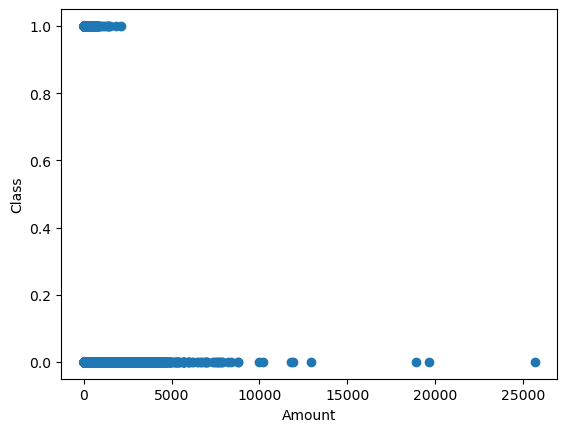

In [29]:
plt.scatter(x=df['Amount'],y=df['Class'])
plt.xlabel('Amount')
plt.ylabel('Class')
plt.show()

Data with Class = 1 has a lower range of amount

Use Logistic Regression to predict the fraud transactions and plot the confusion matrix
of the model.

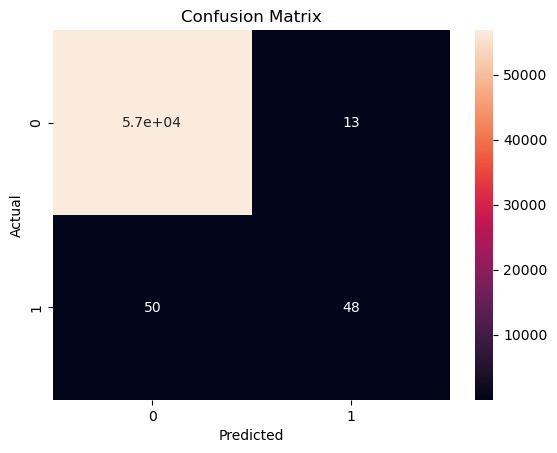

In [28]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Load the creditcard data
df = pd.read_csv('creditcard.csv')
X = df.drop('Class', axis=1)
y = df['Class']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the logistic regression model
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)

# Predict on the test set
y_pred = log_reg.predict(X_test)

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
sns.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()